# <center> <img src="figs/logo_facens.png" alt="Logo Facens" width="110" align="left"/>  <br/> <center>Facens<br/>
</p>

<br/>
  
<font size="3"><center>Prof. Julio Cesar Mastrodomenico</center></font>




# Aprendizado de Máquinas
### 2021PGS2M1
----

## <center> Análise dos Componentes Principais </center>

Implementação e utilização da Análise dos Componentes Principais

<img src="figs/PCA1.gif" width="450" height="450" />

Banco de dados:
- winedataset-red.csv
- Digits
- Iris Dataset


### Exercícios

## 1) Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, \
                            f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import datasets
import random

# Lib de hoje
from sklearn.decomposition import PCA

# Nossos Algoritmos
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [2]:
# Importa o dataset do Iris direto do sklearn
loadiris = datasets.load_iris(as_frame=True)
df_iris = pd.concat((pd.DataFrame(loadiris.data),pd.DataFrame(loadiris.target)), axis=1)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


In [3]:
# Visualizando nosso Dataset
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_iris.iloc[:, 0:-1].values

# pega os valores da última coluna e guarda em um vetor Y
Y = df_iris.iloc[:, -1].values

# imprime as 5 primeiras linhas da matriz X
print('X:', X[0:5,:])

# imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

X: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Y: [0 0 0 0 0]


# Passo a Passo do algoritmo PCA

#### 1 - Normalizar
#### 2 - Calcular a matriz de covariância
#### 3 - Realizar o SVD (Single Value Decomposition)
#### 4 - Escolher os k primeiros componentes
#### 5 - Projetar X no novo espaço

In [5]:
# Normalização dos dados por padronização
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [6]:
# Visualizando o X_norm
X_norm

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:
# Uma demonstração do que acontece dentro da função Standard Scaler
(X-X.mean(axis=0)) / X.std(axis=0, ddof=1)

array([[-8.97673879e-01,  1.01560199e+00, -1.33575163e+00,
        -1.31105215e+00],
       [-1.13920048e+00, -1.31538812e-01, -1.33575163e+00,
        -1.31105215e+00],
       [-1.38072709e+00,  3.27317509e-01, -1.39239929e+00,
        -1.31105215e+00],
       [-1.50149039e+00,  9.78893485e-02, -1.27910398e+00,
        -1.31105215e+00],
       [-1.01843718e+00,  1.24503015e+00, -1.33575163e+00,
        -1.31105215e+00],
       [-5.35383973e-01,  1.93331463e+00, -1.16580868e+00,
        -1.04866679e+00],
       [-1.50149039e+00,  7.86173830e-01, -1.33575163e+00,
        -1.17985947e+00],
       [-1.01843718e+00,  7.86173830e-01, -1.27910398e+00,
        -1.31105215e+00],
       [-1.74301699e+00, -3.60966973e-01, -1.33575163e+00,
        -1.31105215e+00],
       [-1.13920048e+00,  9.78893485e-02, -1.27910398e+00,
        -1.44224482e+00],
       [-5.35383973e-01,  1.47445831e+00, -1.27910398e+00,
        -1.31105215e+00],
       [-1.25996379e+00,  7.86173830e-01, -1.22245633e+00,
      

In [8]:
# Calculando a Matriz de covariância
mat_cov = np.cov(X_norm.T)
mat_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [9]:
# Realizando o Single Value Decomposition
[U, S, V] = np.linalg.svd(mat_cov)

In [10]:
# Matriz U
U

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [11]:
# Vetor S, com os single values
S

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [12]:
# Visualizando a variância para entender a % explicada com os autovalores
100*S/S.sum()

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

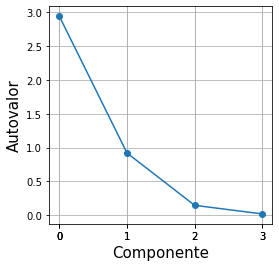

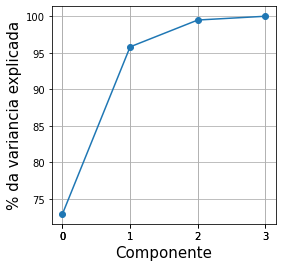

In [13]:
# Análise dos Componentes

def component_analysis(e, plot='none'):
    varexp = 100* e/e.sum()
    cumvarexp = np.cumsum(varexp)

    # Plotando os autovalores
    if (plot=='eigen'):
        plt.figure(figsize = (4,4))
        plt.plot(e, '-o')
        plt.grid(True)
        plt.xlabel('Componente', fontsize = 15)
        plt.ylabel('Autovalor', fontsize = 15)
        xint = []
        locs, labels = plt.xticks()
        for each in locs:
            xint.append(int(each))
        plt.xticks(xint)

    # Plotando a explicação da variancia
    if (plot=='varexp'):
        plt.figure(figsize = (4,4))
        plt.plot(cumvarexp, '-o')
        plt.xlabel('Componente', fontsize = 15)
        plt.ylabel('% da variancia explicada', fontsize = 15)
        plt.grid(True)
        xint = []
        locs, labels = plt.xticks()
        for each in locs:
            xint.append(int(each))
        plt.xticks(xint)

    plt.show()

# Visualização - plot=['eigen', 'varexp']
component_analysis(S, plot='eigen')  
component_analysis(S, plot='varexp')

In [14]:
# Selecionando os componentes 
# Baseando nos autovalores, selecionamos os k primeiros componentes
k = 2
maiores_valores = S.argsort()[::-1][:k]

In [15]:
maiores_valores

array([0, 1], dtype=int64)

In [16]:
# Dos argumentos com maior valor, pegamos os componentes da Matriz V
princip_comp = U[:, maiores_valores]

In [17]:
princip_comp

array([[-0.52106591, -0.37741762],
       [ 0.26934744, -0.92329566],
       [-0.5804131 , -0.02449161],
       [-0.56485654, -0.06694199]])

In [18]:
# Visualizando as dimensões das matrizes X e dos Principais Componentes escolhidos
print(X.shape)
print(princip_comp.shape)

(150, 4)
(4, 2)


In [19]:
# Calculando a matriz projetada
X_proj = X.dot(princip_comp)

In [20]:
X_proj

array([[-2.64026976, -5.2040413 ],
       [-2.6707303 , -4.66690995],
       [-2.45460631, -4.77363639],
       [-2.54551709, -4.64846339],
       [-2.56122842, -5.2586291 ],
       [-2.97594579, -5.70732073],
       [-2.4631572 , -4.92969712],
       [-2.67313922, -5.07641913],
       [-2.43713208, -4.38587157],
       [-2.64535121, -4.75499447],
       [-2.80076135, -5.50437488],
       [-2.62696735, -5.00338477],
       [-2.56213805, -4.62247398],
       [-2.12748116, -4.42641769],
       [-2.75425956, -5.92498314],
       [-2.88150922, -6.27729552],
       [-2.74378055, -5.69752408],
       [-2.69675541, -5.2107355 ],
       [-3.10271466, -5.72152225],
       [-2.67399249, -5.49017336],
       [-2.9976482 , -5.2322845 ],
       [-2.75741289, -5.40453799],
       [-2.12063682, -5.09786541],
       [-3.03772014, -5.04681224],
       [-2.80109128, -5.01073225],
       [-2.83891951, -4.70955003],
       [-2.84415184, -5.09225669],
       [-2.75041766, -5.24423222],
       [-2.71931109,

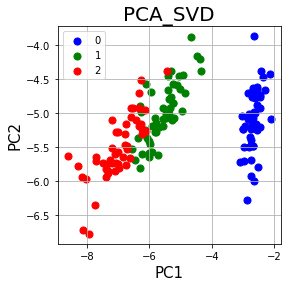

In [21]:
# Plotting 2D data
def plot_data(X,Y,axis='none', title='none'):
    nrow, ncol = X.shape
    colors = list(plt.rcParams['axes.prop_cycle'])
    colors_plot = {0:'b', 1:'g', 2:'r', 3:'m', 4:'c', 5:'y', 6:'k'}
    ys = list()
    for t in [0,1,2]:
        ys.append(np.argwhere(Y==t))
    if (ncol==2):
        plt.figure(figsize = (4,4))
        for nums in range(len(ys)):
            plt.scatter(X[ys[nums],0], X[ys[nums],1], color=colors_plot[nums], s = 50)
        if (title!='none'):
            plt.title(title, fontsize = 20)
        if (axis!='none'):
            plt.xlabel(axis+'1', fontsize = 15)
            plt.ylabel(axis+'2', fontsize = 15)
        plt.legend([0,1,2])
        plt.grid(True)

    
plot_data(X_proj, Y, 'PC', 'PCA_SVD')

In [26]:
#Initializing the PCA Class
class PCA_M():

    #Class responsible for the PCA initialization
    def __init__(self, n_componentes=2, norm = False):
        self.k = n_componentes
        self.norm = norm
    
    # Normalizando os dados
    def normaliza(self,X):
        return (X-X.mean(axis=0)) / X.std(axis=0, ddof=1)
    
    def fit(self,X):
        #Normaliza se necessário:
        if self.norm:
            X_norm = X
        else:
            X_norm = self.normaliza(X)
    
    # Calculando a Matriz de covariancia
        mat_cov = np.cov(X_norm.T)
    
    #SVD
    
        U, S, VT = np.linalg.svd(mat_cov)
    
        self.U = U
        self.S = S
        self.VT = VT
    
    # Selecionando os k primeiros componentes
    
        self.princip_comp = U[:,:self.k]
    
    # Transformando os dados
    def transform(self,X):
        return X.dot(self.princip_comp)

In [27]:
# Instânciando e treinando nosso PCA
pca_cust = PCA_M(2)

In [29]:
pca_cust.fit(X)

In [30]:
pca_cust.S

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

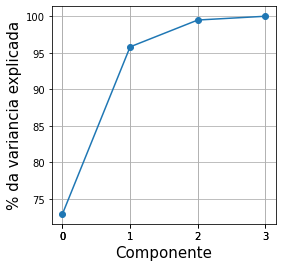

In [31]:
component_analysis(pca_cust.S, plot='varexp')

In [34]:
X_proj_cust = pca_cust.transform(X)
X_proj_cust

array([[-2.64026976, -5.2040413 ],
       [-2.6707303 , -4.66690995],
       [-2.45460631, -4.77363639],
       [-2.54551709, -4.64846339],
       [-2.56122842, -5.2586291 ],
       [-2.97594579, -5.70732073],
       [-2.4631572 , -4.92969712],
       [-2.67313922, -5.07641913],
       [-2.43713208, -4.38587157],
       [-2.64535121, -4.75499447],
       [-2.80076135, -5.50437488],
       [-2.62696735, -5.00338477],
       [-2.56213805, -4.62247398],
       [-2.12748116, -4.42641769],
       [-2.75425956, -5.92498314],
       [-2.88150922, -6.27729552],
       [-2.74378055, -5.69752408],
       [-2.69675541, -5.2107355 ],
       [-3.10271466, -5.72152225],
       [-2.67399249, -5.49017336],
       [-2.9976482 , -5.2322845 ],
       [-2.75741289, -5.40453799],
       [-2.12063682, -5.09786541],
       [-3.03772014, -5.04681224],
       [-2.80109128, -5.01073225],
       [-2.83891951, -4.70955003],
       [-2.84415184, -5.09225669],
       [-2.75041766, -5.24423222],
       [-2.71931109,

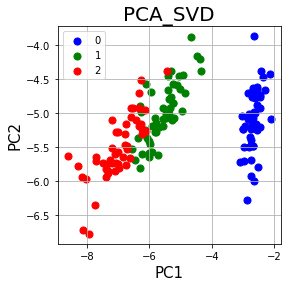

In [36]:
plot_data(X_proj_cust, Y,'PC','PCA_SVD')

In [37]:
# Dividindo em Train Test
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_proj_cust, Y, test_size = 0.2, random_state = 0)

In [40]:
# Importar a classe e realizar o predict nos novos dados projetos em 2D
knn_sk_pca = KNeighborsClassifier()

# Treino KNN (armazenamento)
knn_sk_pca.fit(X_train_p, y_train_p)

# Calcular a acurácia do modelo nos dados de teste
resultados = knn_sk_pca.predict(X_test_p)

acuracia = np.sum(resultados==y_test_p)/len(y_test_p)

print('Acuracia obtida pelo seu classificador foi = %.2f%%\n' %( acuracia*100 ) )

Acuracia obtida pelo seu classificador foi = 93.33%



## Comparando com o dataset sem projeção

In [41]:
# Carregando o dataset
iris = datasets.load_iris(as_frame=True)

In [42]:
# Visualizando os dados
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

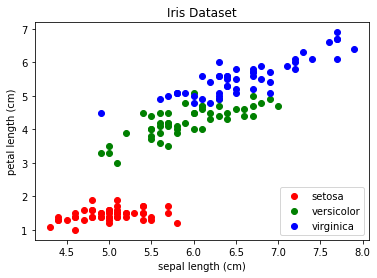

In [44]:
# Plot de visualização dos dados com apenas 2 caracteristicas
n_samples = len(iris.target)
for t in set(iris.target):
    x = [iris.data.iloc[i,0] for i in range(n_samples) if iris.target[i]==t]
    y = [iris.data.iloc[i,2] for i in range(n_samples) if iris.target[i]==t]
    plt.scatter(x,
                y,
                color=['red', 'green', 'blue'][t],
                label=iris.target_names[t])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title('Iris Dataset')
plt.legend(iris.target_names, loc='lower right')
plt.show()

In [45]:
# Novo split com os dados sem a projeção
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 0)

In [46]:
# Importar a classe e realizar o predict
knn_sk = KNeighborsClassifier()

knn_sk.fit(X_train, y_train)

# Calcular a acurácia do modelo nos dados de teste
resultados = knn_sk.predict(X_test)

acuracia = np.sum(resultados==y_test)/len(y_test)

print('Acuracia obtida pelo seu classificador foi = %.2f%%\n' %( acuracia*100 ) )

Acuracia obtida pelo seu classificador foi = 96.67%



## Visualizando a superfície de decisão, agora possível em 2D

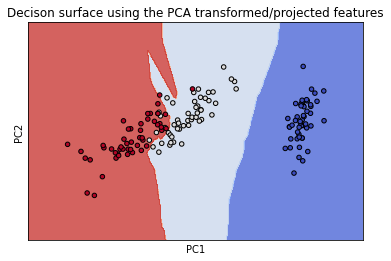

In [47]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

y = iris.target
fig, ax = plt.subplots()

# Set-up grid for plotting.
X0, X1 = X_proj[:, 0], X_proj[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, knn_sk_pca, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


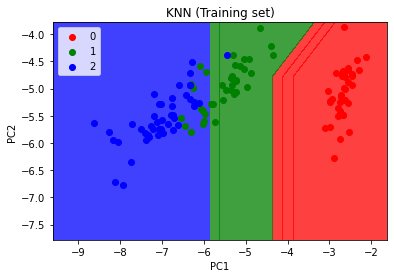

In [50]:
# Visualizando os resultados da outra forma
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_p, y_train_p
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 1))
plt.contourf(X1, X2, knn_sk_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


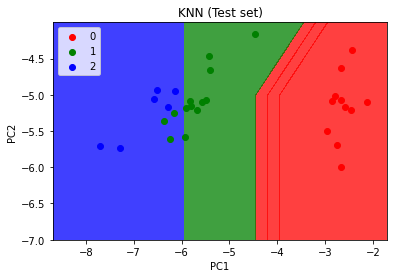

In [51]:
# Resultado no teste
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_p, y_test_p
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 1))
plt.contourf(X1, X2, knn_sk_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Exercício dataset Titanic

In [56]:
# Importando o csv para um pandas dataframe
df = pd.read_csv("titanic.data")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
# Pandas get Dummies
dummies = pd.get_dummies(df['Sex'])

In [58]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [59]:
# Novo dataframe com os dummies
df_novo = pd.concat([df, dummies], axis='columns')

In [60]:
df_novo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [61]:
# Remoção de colunas não relevantes
df_novo.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin'], axis='columns', inplace=True)

In [62]:
df_novo

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,NaN,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,1


In [63]:
# Visulizando os dados, realizando possíveis transformações
df_novo['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [64]:
df_novo['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
df_novo['Embarked'] = df_novo['Embarked'].fillna('S')

In [66]:
df_novo

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,NaN,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,1


In [67]:
# Instanciando o labelEncoder
le = LabelEncoder()

df_novo['Embarked'] = le.fit_transform(df_novo['Embarked'])

In [68]:
df_novo

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,2,0,1
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,2,1,0
3,1,1,35.0,1,0,53.1000,2,1,0
4,0,3,35.0,0,0,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,0,1
887,1,1,19.0,0,0,30.0000,2,1,0
888,0,3,NaN,1,2,23.4500,2,1,0
889,1,1,26.0,0,0,30.0000,0,0,1


In [69]:
df_novo['Age'] = df_novo['Age'].fillna(df_novo.Age.mean())

In [70]:
df_novo

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.000000,1,0,7.2500,2,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0
2,1,3,26.000000,0,0,7.9250,2,1,0
3,1,1,35.000000,1,0,53.1000,2,1,0
4,0,3,35.000000,0,0,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,2,0,1
887,1,1,19.000000,0,0,30.0000,2,1,0
888,0,3,29.699118,1,2,23.4500,2,1,0
889,1,1,26.000000,0,0,30.0000,0,0,1


In [75]:
# Aplicar PCA
pca_titanic = PCA_M(2)

In [84]:
X_titanic = df_novo.drop(columns = ['Survived']).values

In [85]:
X_titanic

array([[ 3.        , 22.        ,  1.        , ...,  2.        ,
         0.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  2.        ,
         1.        ,  0.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ...,  2.        ,
         1.        ,  0.        ],
       [ 1.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 32.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ]])

In [88]:
pca_titanic.fit(X_titanic)

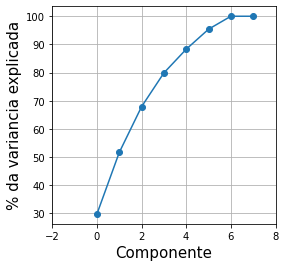

In [89]:
component_analysis(pca_titanic.S, plot = 'varexp')

In [90]:
# Verificar resultado com um algoritmo a escolha
X_proj_titanic = pca_titanic.transform(X_titanic)

In [91]:
X_proj_titanic

array([[-0.4148141 , 11.14535493],
       [21.94108805, 44.18442747],
       [ 0.45611779, 13.58829431],
       ...,
       [ 6.2996856 , 20.21613489],
       [ 7.50122584, 23.53247944],
       [-1.01436148, 16.95873661]])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_proj_titanic, df_novo.Survived.values, random_state=0)

In [93]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
#verificando a métrica
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       139
           1       0.58      0.50      0.54        84

    accuracy                           0.68       223
   macro avg       0.65      0.64      0.65       223
weighted avg       0.67      0.68      0.67       223



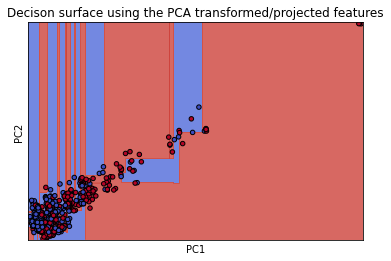

In [97]:
y = df_novo.Survived.values
fig, ax = plt.subplots()

# Set-up grid for plotting.
X0, X1 = X_proj_titanic[:, 0], X_proj_titanic[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, classifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
plt.show()

## Exercício dataset Wine ( direto do sklearn )

$ from sklearn import datasets

$ wine = datasets.load_wine()

In [98]:
# Carregando o dataset
wine = datasets.load_wine(as_frame=True)

In [99]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [100]:
wine.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [131]:
# Aplicar PCA
X = wine.data.values
y = wine.target.values

In [132]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [133]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_norm)

In [110]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

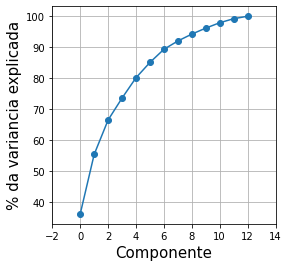

In [111]:
#Plot com todos os componentes
component_analysis(pca.explained_variance_ratio_, plot = 'varexp')

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2)

In [151]:
# Testar métricas em um algoritmo a sua escolha
classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [152]:
#Verificando a metrica
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.89      0.89      0.89         9
           2       1.00      0.93      0.96        14

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


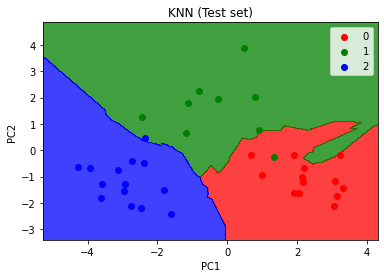

In [153]:
# Resultado no teste
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [147]:
# Testar métricas em um algoritmo a sua escolha
classifier = GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB()

In [148]:
#Verificando a metrica
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00        14

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


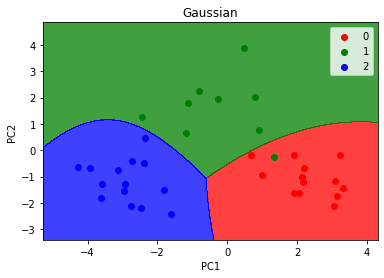

In [149]:
# Resultado no teste
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Gaussian')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualização do dataset dos dígitos com PCA e K-Means

In [154]:
#carregando o dataset dos digitos
d_digits = datasets.load_digits(as_frame = True)

In [155]:
d_digits.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [156]:
d_digits.target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [160]:
d1 = d_digits.data.iloc[999, :].values
d1

array([ 0.,  0.,  9., 15., 14.,  2.,  0.,  0.,  0.,  0.,  9.,  3.,  9.,
        8.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,
        0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  2., 10., 11., 15.,  2.,
        0.,  0.,  3.,  1.,  0.,  0., 14.,  4.,  0.,  0., 10., 13.,  7.,
        2., 12.,  4.,  0.,  0.,  0.,  7., 14., 16., 10.,  0.,  0.])

In [161]:
im_d1 = d1.reshape(8,8)
im_d1.shape

(8, 8)

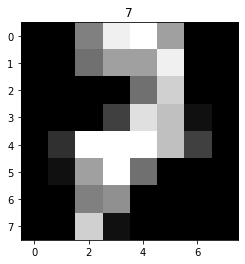

In [172]:
numero = 1586
d1 = d_digits.data.iloc[numero, :].values
im_d1 = d1.reshape(8,8)
plt.imshow(im_d1, cmap = 'gray')
plt.title(str(d_digits.target[numero]))
plt.show()

In [167]:
d_reduzido = PCA(n_components = 2).fit_transform(d_digits.data)
d_reduzido.shape

(1797, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

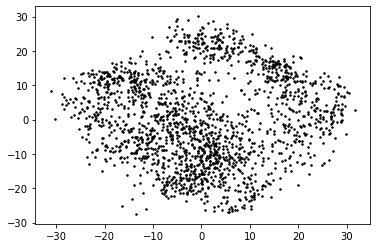

In [168]:
plt.plot(d_reduzido[:,0], d_reduzido[:,1], "k.", markersize = 3)
plt.show

In [169]:
# KMeans para visualização de clusters
kmeans = KMeans(n_clusters = 10)
kmeans.fit(d_reduzido)

KMeans(n_clusters=10)

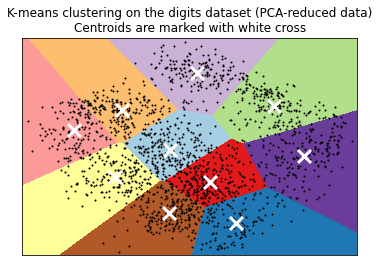

In [171]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = d_reduzido[:, 0].min() - 1, d_reduzido[:, 0].max() + 1
y_min, y_max = d_reduzido[:, 1].min() - 1, d_reduzido[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, 
h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
Z,
interpolation="nearest",
extent=(xx.min(), xx.max(), yy.min(), yy.max()),
cmap=plt.cm.Paired,
aspect="auto",
origin="lower",
)
plt.plot(d_reduzido[:, 0], d_reduzido[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
centroids[:, 0],
centroids[:, 1],
marker="x",
s=169,
linewidths=3,
color="w",
zorder=10,
)
plt.title(
"K-means clustering on the digits dataset (PCA-reduced data)\n"
"Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [173]:
pca = PCA()
dados_d = pca.fit_transform(d_digits.data)

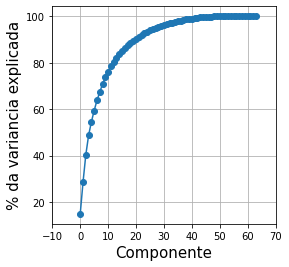

In [174]:
component_analysis(pca.explained_variance_ratio_, plot = 'varexp')

In [175]:
pca = PCA(n_components = 15)
dados_d = pca.fit_transform(d_digits.data)

In [177]:
gaussian = GaussianNB()

In [180]:
%timeit gaussian.fit(dados_d, d_digits.target)

3.87 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [181]:
%timeit gaussian.fit(d_digits.data, d_digits.target)

9.86 ms ± 227 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Exercício de reconstrução de imagem utilizando k componentes

In [183]:
# Armazenando a imagem 
img1 = plt.imread('imagem_1.jpg')

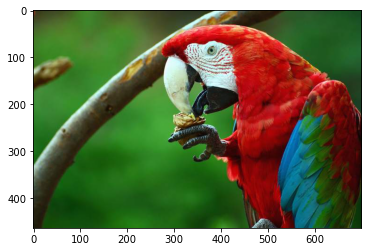

In [184]:
# Visualizando a imagem
plt.imshow(img1)

In [185]:
img1.shape

(464, 700, 3)

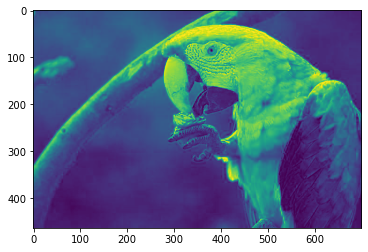

In [193]:
plt.imshow(img1[:,:,0])
plt.show()

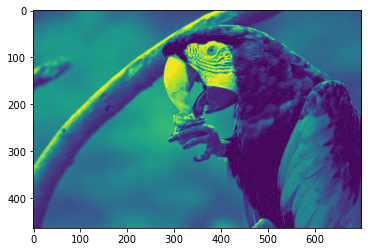

In [194]:
plt.imshow(img1[:,:,1])
plt.show()

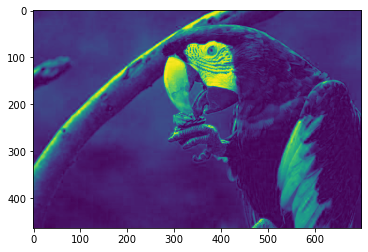

In [195]:
plt.imshow(img1[:,:,2])
plt.show()

(464, 700)


<function matplotlib.pyplot.show(close=None, block=None)>

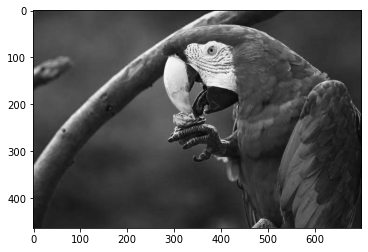

In [187]:
image_sum = img1.sum(axis = 2)
new_image = image_sum / image_sum.max()
print(new_image.shape)
plt.imshow(new_image, cmap = "gray")
plt.show

In [188]:
new_image

array([[0.30759162, 0.30366492, 0.29973822, ..., 0.17015707, 0.17015707,
        0.17015707],
       [0.30497382, 0.29973822, 0.29712042, ..., 0.17015707, 0.17015707,
        0.17015707],
       [0.29450262, 0.29581152, 0.29319372, ..., 0.17015707, 0.17015707,
        0.17015707],
       ...,
       [0.10078534, 0.09685864, 0.09293194, ..., 0.09947644, 0.09947644,
        0.09947644],
       [0.10078534, 0.09685864, 0.09293194, ..., 0.09947644, 0.09947644,
        0.09947644],
       [0.10078534, 0.09685864, 0.09293194, ..., 0.09947644, 0.09947644,
        0.09947644]])

In [196]:
# Aplicando PCA
pca_img = PCA_M(700)
pca_img.fit(new_image)

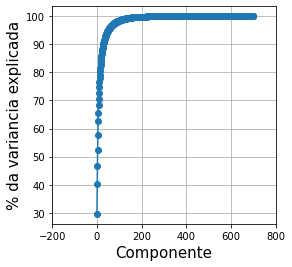

In [197]:
component_analysis(pca_img.S, plot = 'varexp')

In [198]:
x_proj = pca_img.transform(new_image)

In [200]:
x_proj.shape

(464, 700)

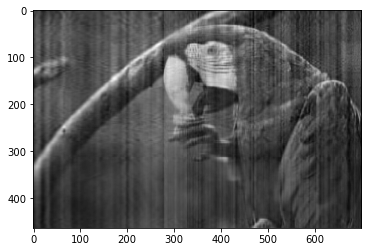

In [203]:
k_recons = 50
x_rec = x_proj [:,:k_recons].dot(pca_img.U[:,:k_recons].T)
plt.imshow(x_rec, cmap = 'gray')
plt.show()

Number of components explaining 95% variance: 50


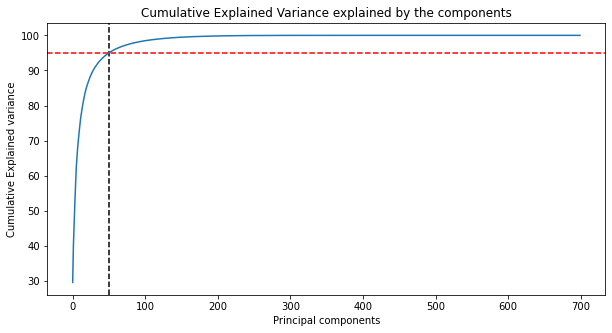

In [205]:
var_cumu = np.cumsum(pca_img.S/pca_img.S.sum())*100
# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax=plt.plot(var_cumu)

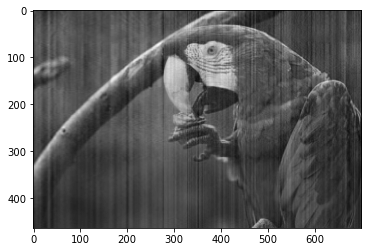

In [208]:
def plot_at_k(k):
    x_rec = x_proj [:,:k].dot(pca_img.U[:,:k].T)
    plt.imshow(x_rec, cmap = 'gray')
plot_at_k(100)

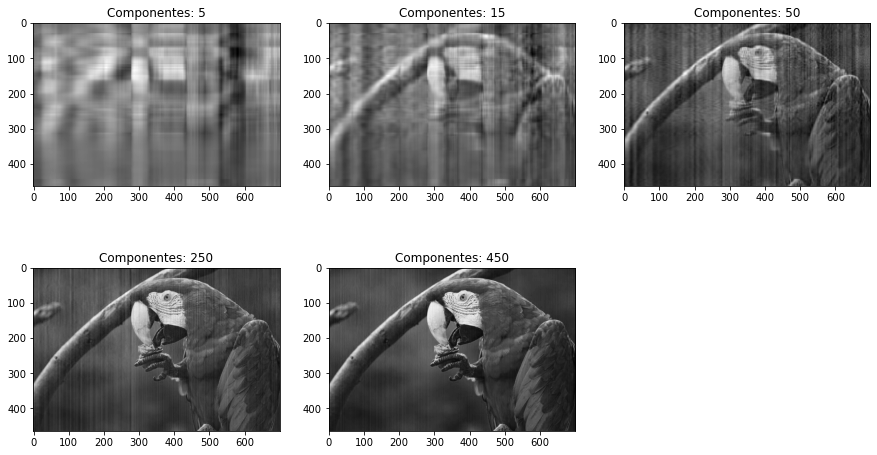

In [209]:
ks = [5,15,50,250, 450]
plt.figure(figsize = [15,9])

for i in range(5):
    plt.subplot(2, 3, i+1)
    plot_at_k(ks[i])
    plt.title('Componentes: ' + str(ks[i]))

plt.subplots_adjust(wspace = 0.2, hspace= 0.0)
plt.show()

In [212]:
U, S, VT =  np.linalg.svd(new_image)

In [213]:
S

array([1.66757724e+02, 3.41854137e+01, 2.87927988e+01, 2.13336946e+01,
       1.83918580e+01, 1.64547131e+01, 1.57323113e+01, 1.39690955e+01,
       1.32949805e+01, 1.13440677e+01, 1.08725165e+01, 1.03572515e+01,
       1.02985342e+01, 9.76699498e+00, 8.87219685e+00, 8.57223320e+00,
       7.85823527e+00, 7.70623133e+00, 7.02011586e+00, 6.90346759e+00,
       6.45452091e+00, 6.08234721e+00, 5.84163389e+00, 5.62884394e+00,
       5.56148900e+00, 5.36914761e+00, 5.30445729e+00, 5.04201334e+00,
       4.98255156e+00, 4.76789198e+00, 4.71735158e+00, 4.61195876e+00,
       4.47412610e+00, 4.36206731e+00, 4.29204814e+00, 4.11435884e+00,
       4.04650899e+00, 3.86579169e+00, 3.79533462e+00, 3.70680894e+00,
       3.59077190e+00, 3.54284149e+00, 3.47912468e+00, 3.42442373e+00,
       3.34469753e+00, 3.28516834e+00, 3.22418101e+00, 3.16519186e+00,
       3.12778123e+00, 3.03457135e+00, 3.00248513e+00, 2.95566836e+00,
       2.88593980e+00, 2.82389544e+00, 2.76847374e+00, 2.73725264e+00,
      

In [214]:
S = np.diag(S)
S

array([[1.66757724e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.41854137e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.87927988e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.83980353e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.58396976e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.41870371e-03]])

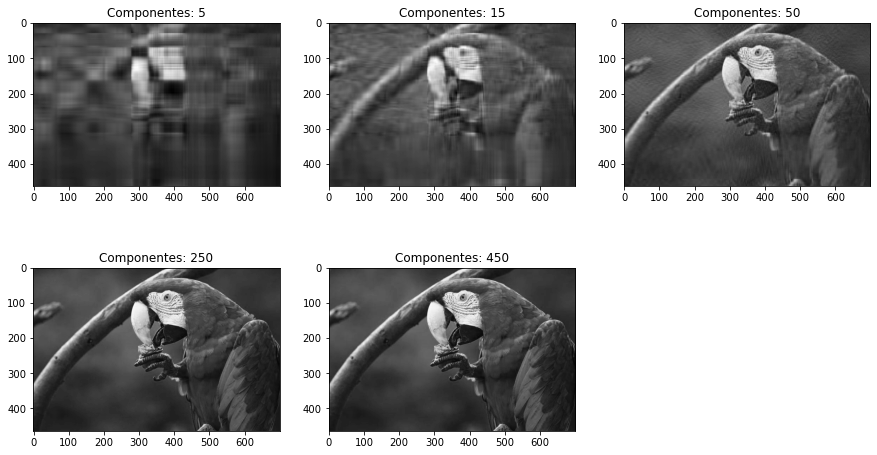

In [218]:
plt.figure(figsize = [15,9])

for i, r in enumerate(ks):
    X_svd = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    
    plt.subplot(2, 3, i+1)
    plt.imshow(X_svd, cmap = "gray")
    plt.title('Componentes: ' + str(ks[i]))

plt.subplots_adjust(wspace = 0.2, hspace= 0.0)
plt.show()